In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from xgboost import XGBClassifier
import shap

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_csv('../works/data/adult.csv')
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
data['income'] = data['income'].map({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K': 1})
data['workclass'] = data['workclass'].replace(['?'], 'Unknown')
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Unknown,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,29,Unknown,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0


Text(0.5, 0, 'Workclass')

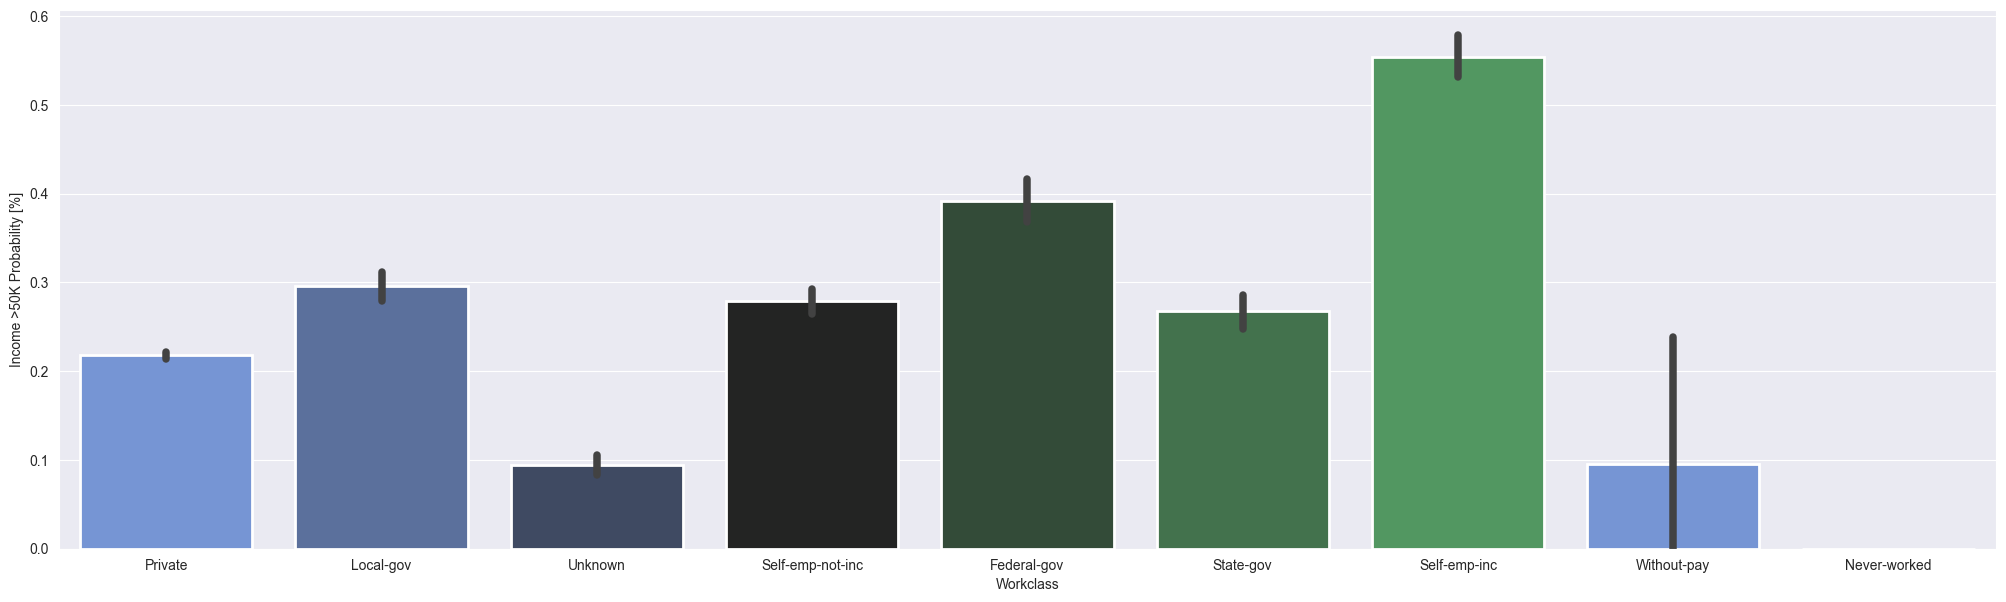

In [7]:
fig, ax = plt.subplots(figsize=(25, 7))
sns.set_context('poster')
current_palette = sns.diverging_palette(255, 133, l=60, n=7, center='dark')

fig = sns.barplot(x='workclass', y='income', data=data, palette=current_palette)

fig.set_ylabel('Income >50K Probability [%]')
fig.set_xlabel('Workclass')

Text(0.5, 0, 'Marital Status')

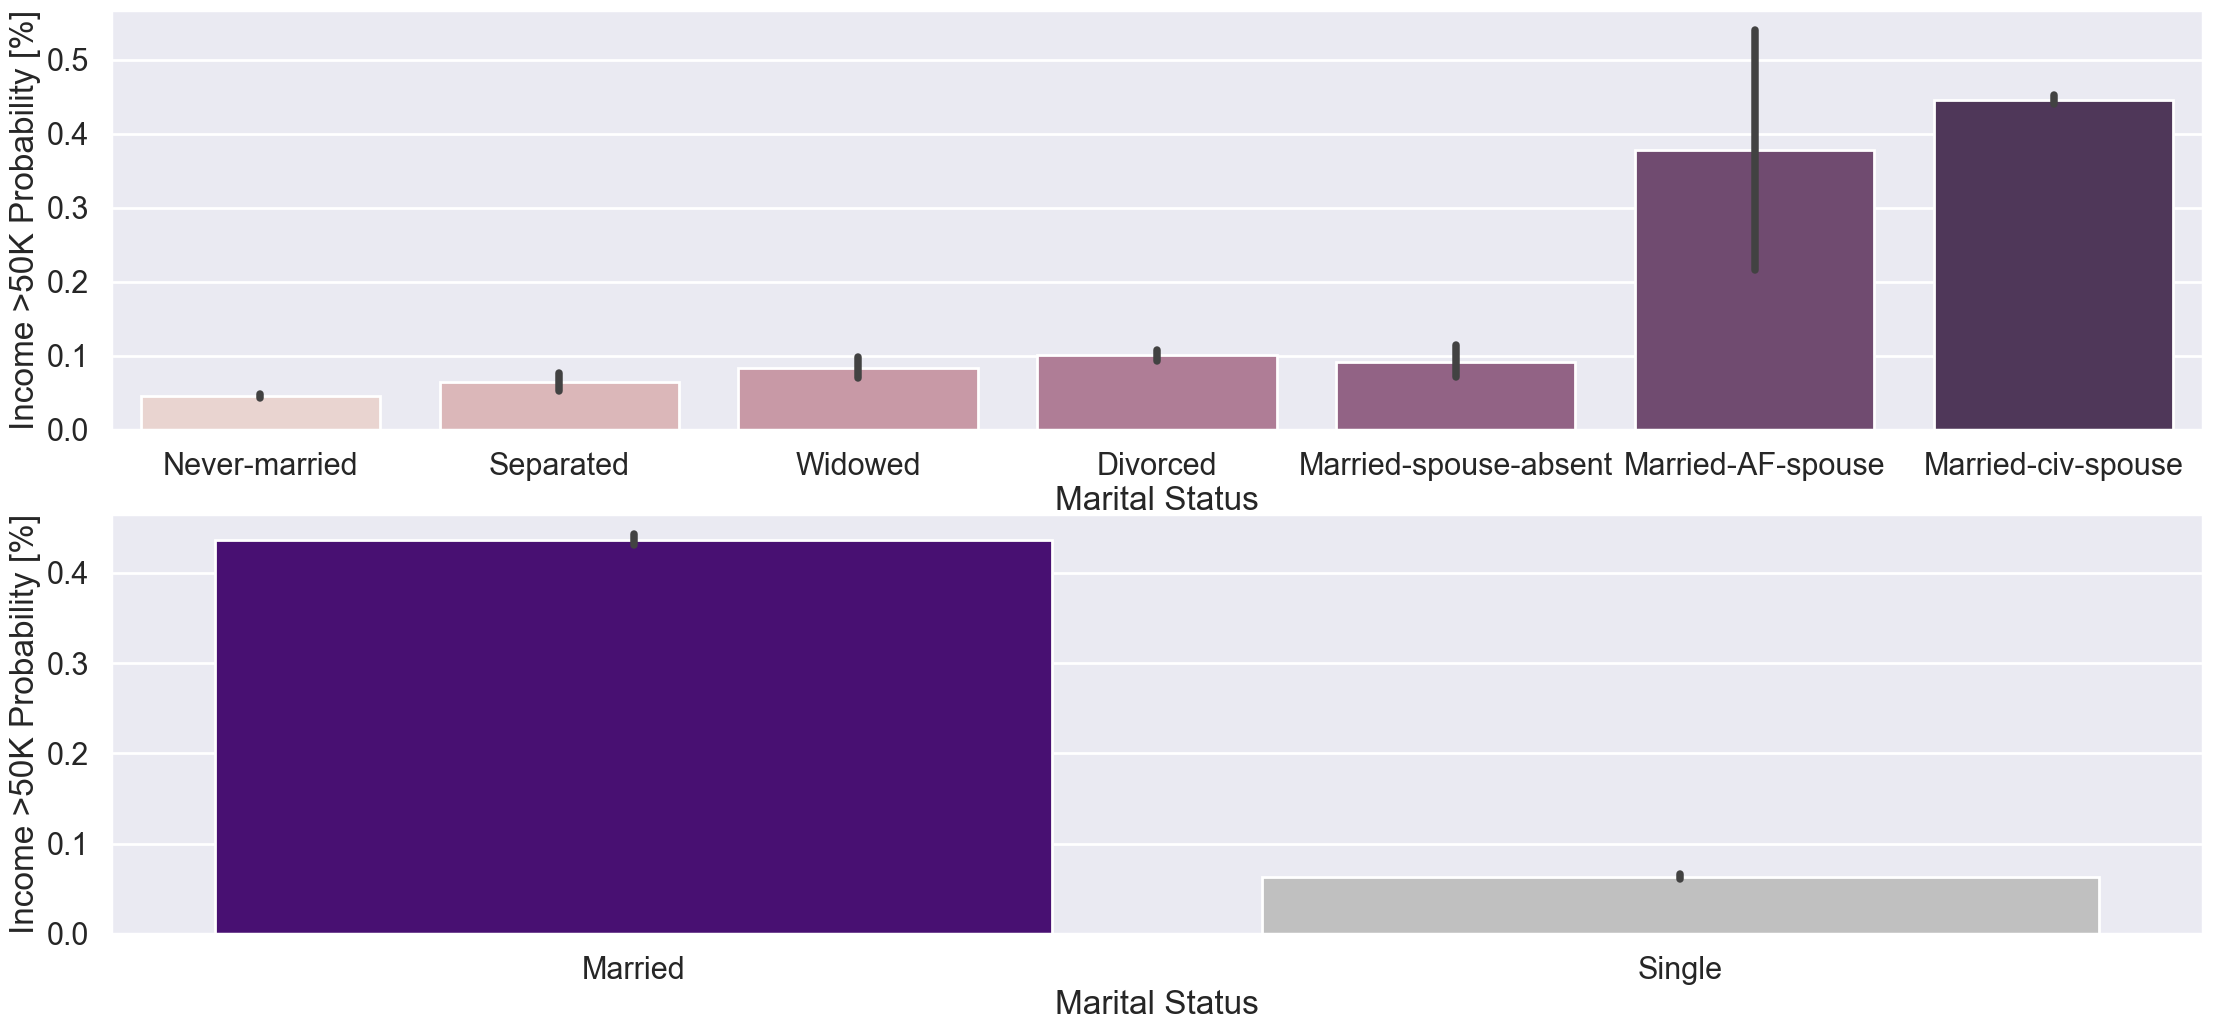

In [8]:
fig, axe = plt.subplots(2,1,figsize=(27,12))
current_palette =sns.cubehelix_palette(8)
plt.style.use('seaborn-whitegrid')
fig = sns.barplot(x='marital-status',y='income',data=data,ax=axe[0],order =['Never-married','Separated','Widowed','Divorced','Married-spouse-absent','Married-AF-spouse','Married-civ-spouse'],palette=current_palette)

fig.set_ylabel('Income >50K Probability [%]')
fig.set_xlabel('Marital Status')


datasetCopy= data.copy()
datasetCopy['marital-status'] = datasetCopy['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], '1')
datasetCopy['marital-status'] = datasetCopy['marital-status'].replace(['Never-married','Divorced','Separated','Widowed'], '0')
datasetCopy['marital-status'] = datasetCopy['marital-status'].astype(int)

sns.set_context('poster')
fig = sns.barplot(x='marital-status',y='income',data=datasetCopy,ax=axe[1], order=[1,0],palette=['indigo','silver'])

fig.set(xticklabels =['Married','Single'])
fig.set_ylabel('Income >50K Probability [%]')
fig.set_xlabel('Marital Status')

Text(0.5, 0, 'Relationship')

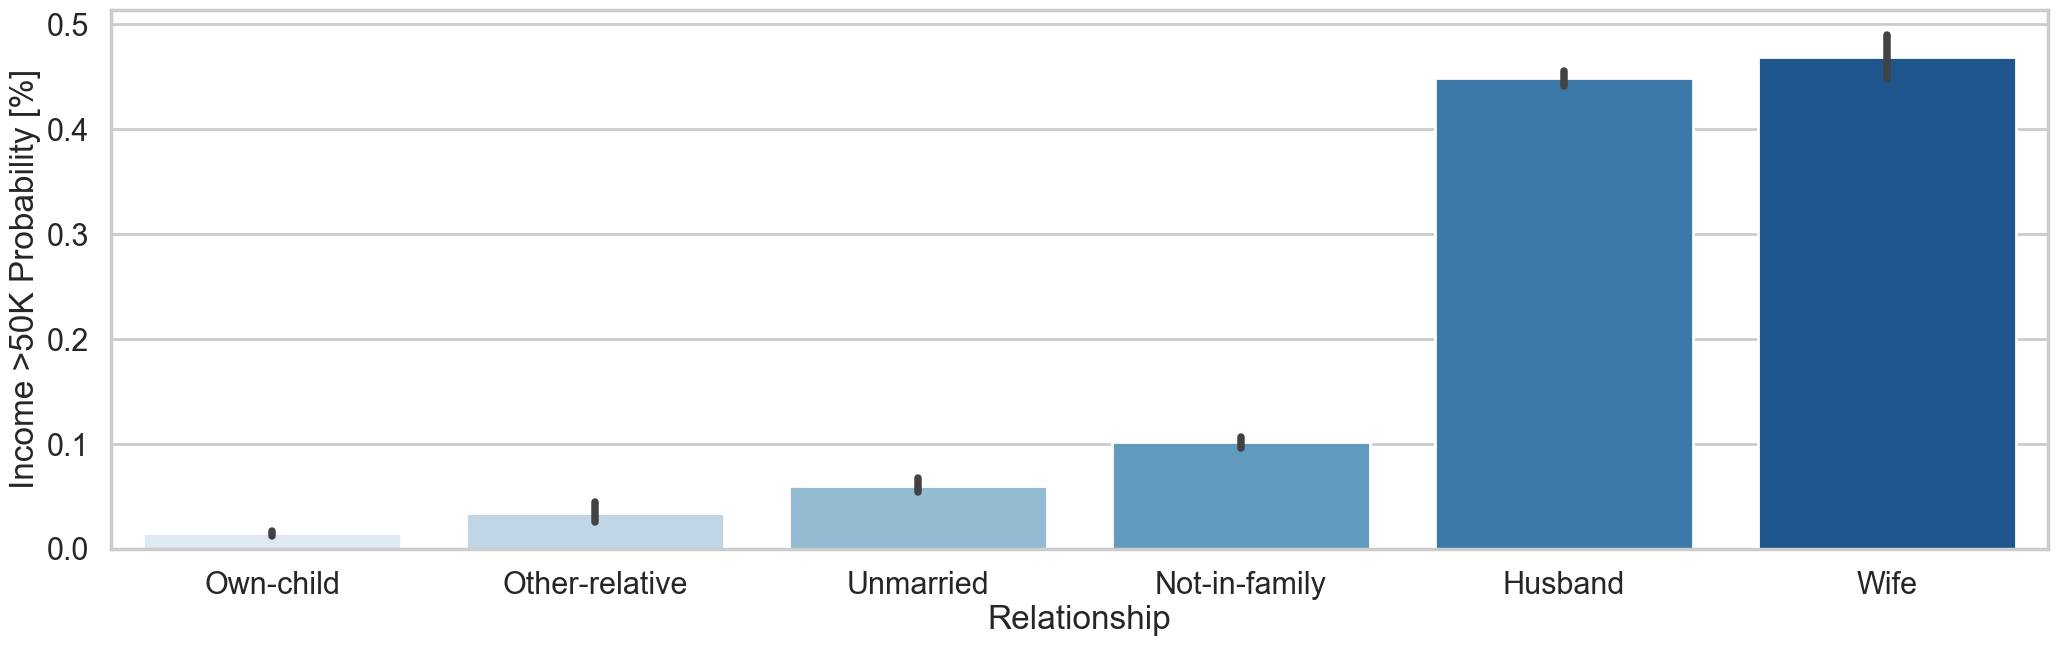

In [9]:
fig, ax = plt.subplots(figsize=(25,7))
sns.set_context('poster')
current_palette = sns.color_palette('Blues')

fig = sns.barplot(x='relationship',y='income',data=data, order=['Own-child','Other-relative','Unmarried','Not-in-family','Husband','Wife'], palette=current_palette)

fig.set_ylabel('Income >50K Probability [%]')
fig.set_xlabel('Relationship')

<AxesSubplot:>

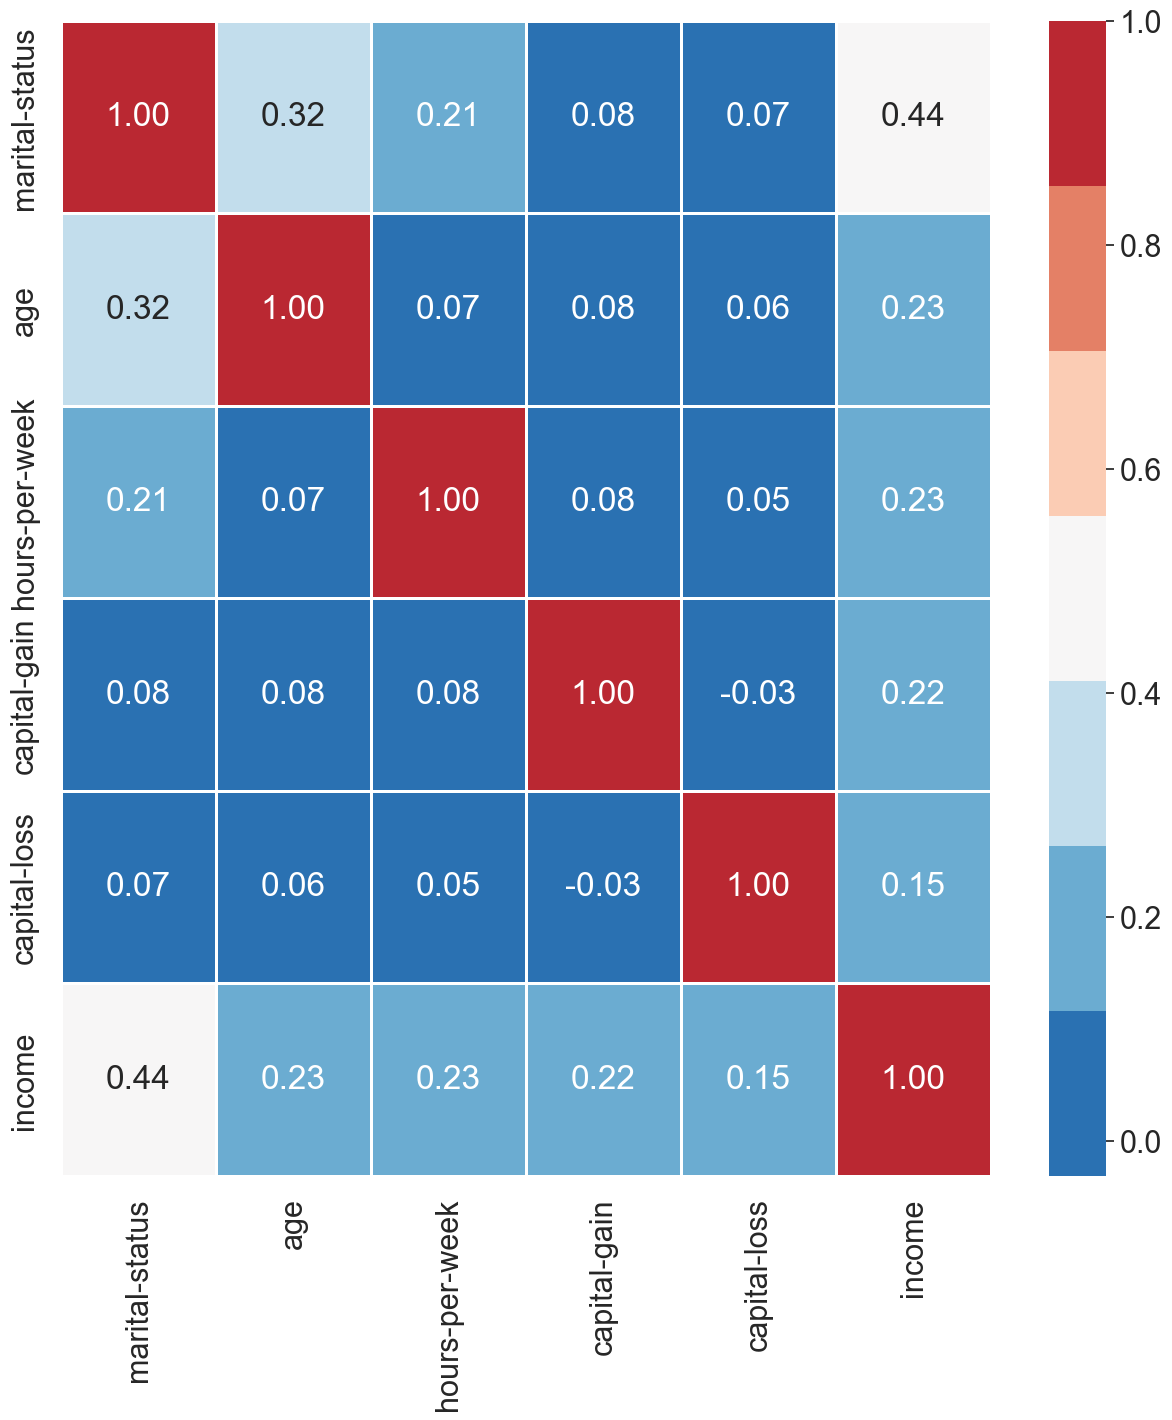

In [10]:
numeric_columns = ['marital-status','education','age','hours-per-week','capital-gain','capital-loss','income']

fig, axe = plt.subplots(figsize=(15,15))
sns.set_context('poster')
sns.set(font_scale=2)
map1 = sns.color_palette('RdBu_r', 7)
sns.heatmap(datasetCopy[numeric_columns].corr(),annot=True, fmt='.2f',linewidths=2,cmap = map1)

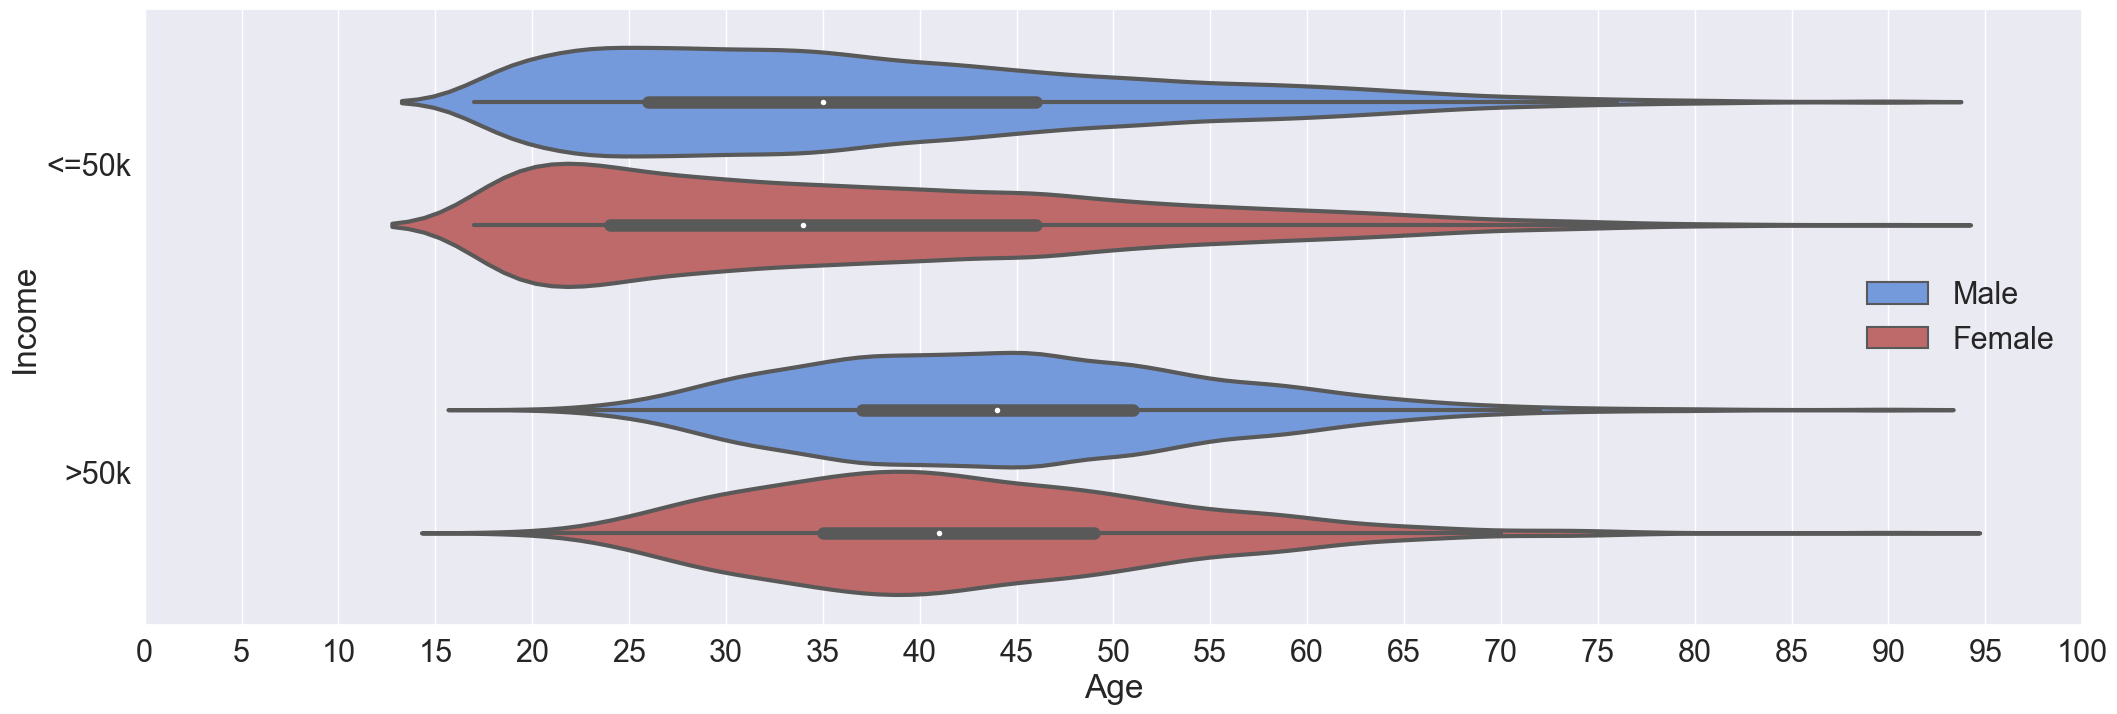

In [11]:
fig, axe = plt.subplots(figsize=(25,8))
sns.set_context('poster')

g=sns.violinplot(x='age',y='income',hue='gender',hue_order=['Male','Female'],data=data,orient='h',palette=['cornflowerblue','indianred',])

g.set_ylabel('Income')
g.set_xlabel('Age')
g.set(yticklabels =['<=50k','>50k'])
setThis = g.legend(loc='center right')
plt.xlim(0,100)
axe.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [46]:
data = pd.read_csv('../works/data/adult.csv')
data['income'] = data['income'].map({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K': 1})
data['workclass'] = data['workclass'].replace(['?'], 'Unknown')
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Unknown,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [47]:
#Before we can begin to model are dataset, we first have to drop any categorical data and convert the one's we want to keep into binary:: Yes (1) or No (0)
data['marital-status'] = data['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
data['marital-status'] = data['marital-status'].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Single,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Unknown,103497,Some-college,10,Single,?,Own-child,White,Female,0,0,30,United-States,0


In [48]:
data['marital-status'] = data['marital-status'].map({'Married': 0, 'Single': 1})
# data['marital-status'] = data['marital-status']
data.drop(labels=['gender','workclass','education','occupation','relationship','race','native-country'], axis = 1, inplace = True)

data.head(5)

,age,fnlwgt,educational-num,marital-status,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,1,0,0,40,0
1,38,89814,9,0,0,0,50,0
2,28,336951,12,0,0,0,40,1
3,44,160323,10,0,7688,0,40,1
4,18,103497,10,1,0,0,30,0


In [49]:
Y = data.income
data.drop(labels=['income'], axis = 1, inplace = True)
data.head(5)

,age,fnlwgt,educational-num,marital-status,capital-gain,capital-loss,hours-per-week
0,25,226802,7,1,0,0,40
1,38,89814,9,0,0,0,50
2,28,336951,12,0,0,0,40
3,44,160323,10,0,7688,0,40
4,18,103497,10,1,0,0,30


In [50]:
categorical_features = ['workclass', 'education', 'occupation', 'relationship', 'race', 'gender', 'native-country']
for f in categorical_features:
    data[f].astype('category')

KeyError: 'workclass'

In [51]:
columns = [*data.columns]

In [52]:
numeric_columns = ['marital-status','age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
X=data[numeric_columns]
train_X, val_X, train_y, val_y = train_test_split(X,Y,test_size=0.3,random_state=0)

In [60]:
xgb_model = XGBClassifier(n_estimators=1000)

In [61]:
xgb_model.fit(train_X, train_y, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [62]:
predictions = xgb_model.predict(val_X)

PREDICT PREDICT PREDICT PREDICT


In [63]:
accuracy = accuracy_score(val_y, predictions)
print(accuracy)

0.8471302804886371


# SPRAWDŹ JUTRO CZY XAI JEST UŻYWANY DO UCZENIA ML

In [ ]:
default_params = {'learning_rate': 0.3, 'min_split_loss': 0, 'max_depth': 6, 'min_child_weight': 1, 'max_delta_step': 0}
print(type(default_params))

In [ ]:
xgb_model.get_xgb_params()

In [ ]:
from pprint import pprint

pprint(xgb_model.evals_result())

In [ ]:
xgb_model.score